In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Step 2: Navigate to the zip file
import os
zip_path = '/content/drive/MyDrive/archive (2).zip'  # Replace with your actual path

In [ ]:
# # Step 3: Extract the zip file
# import zipfile

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Attendance')  # Specify the extraction path


In [ ]:
#  #Verify the extracted files
#  extracted_path = '/content/drive/MyDrive/Attendance'
#  extracted_files = os.listdir(extracted_path)
#  print(extracted_files)

['Celebrity Faces Dataset']


In [2]:

# Verify the sub files
extracted_path_2 = '/content/drive/MyDrive/Attendance/Celebrity Faces Dataset'
extracted_files_2 = os.listdir(extracted_path_2)
print(extracted_files_2)

['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman', 'Jennifer Lawrence', 'Johnny Depp', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from collections import Counter


In [4]:
def cropImg(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        return None  # No face detected

    for (x, y, w, h) in faces:
        cropped_face = image[y:y+h, x:x+w]
        return cropped_face


In [5]:
# Path to the dataset
dataset_path = '/content/drive/MyDrive/Attendance/Celebrity Faces Dataset'
croppedPath = '/content/drive/MyDrive/Attendance/Cropped Faces'
os.makedirs(croppedPath, exist_ok=True)

In [6]:
# Cropping faces and saving to new directory
for folder in os.listdir(dataset_path):
    folderPath = os.path.join(dataset_path, folder)
    croppedFolderPath = os.path.join(croppedPath, folder)
    os.makedirs(croppedFolderPath, exist_ok=True)

    for img in os.listdir(folderPath):
        imgPath = os.path.join(folderPath, img)
        croppedFace = cropImg(imgPath)

        if croppedFace is not None:
            croppedImgPath = os.path.join(croppedFolderPath, img)
            cv2.imwrite(croppedImgPath, croppedFace)

In [6]:
# Preprocess images
def preprocess_image(image_path, target_size=(160, 160)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image.astype('float') / 255.0
    image = img_to_array(image)
    return image

In [7]:
def preprocess_dataset(dataset_path, target_size=(160, 160)):
    data = []
    labels = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(root, file)
                image = preprocess_image(image_path, target_size)
                label = root.split(os.path.sep)[-1]
                data.append(image)
                labels.append(label)
    return np.array(data), np.array(labels)

In [8]:
data, labels = preprocess_dataset(croppedPath)

In [9]:
def get_dataset_statistics(dataset_path):
    image_count = 0
    class_counter = Counter()
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_count += 1
                class_label = root.split(os.path.sep)[-1]
                class_counter[class_label] += 1

    total_classes = len(class_counter)
    return image_count, total_classes, class_counter

# Path to the extracted dataset
dataset_path = '/content/drive/MyDrive/Attendance/Cropped Faces'

# Get dataset statistics
total_images, total_classes, class_distribution = get_dataset_statistics(dataset_path)

# Print dataset statistics
print(f'Total number of images: {total_images}')
print(f'Total number of unique classes: {total_classes}')
print(f'Class distribution: {class_distribution}')




Total number of images: 1629
Total number of unique classes: 17
Class distribution: Counter({'Natalie Portman': 100, 'Leonardo DiCaprio': 99, 'Nicole Kidman': 99, 'Scarlett Johansson': 99, 'Jennifer Lawrence': 98, 'Angelina Jolie': 97, 'Brad Pitt': 97, 'Hugh Jackman': 97, 'Tom Hanks': 97, 'Megan Fox': 96, 'Robert Downey Jr': 95, 'Sandra Bullock': 95, 'Tom Cruise': 95, 'Denzel Washington': 94, 'Johnny Depp': 93, 'Kate Winslet': 93, 'Will Smith': 85})


In [10]:
# Debug: Check unique labels and their count
unique_labels = np.unique(labels)
print(f'Unique labels before encoding: {unique_labels}')
print(f'Number of unique labels: {len(unique_labels)}')

Unique labels before encoding: ['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']
Number of unique labels: 17


In [11]:
# Determine the number of classes
num_classes = len(unique_labels)
print(f'Number of classes: {num_classes}')

Number of classes: 17


In [12]:
# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [13]:
# Save the fitted LabelEncoder for later use
import pickle
with open('/content/drive/MyDrive/Attendance/label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [14]:
# Debug: Check unique encoded labels and their count
unique_encoded_labels = np.unique(labels)
print(f'Unique labels after encoding: {unique_encoded_labels}')
print(f'Number of unique encoded labels: {len(unique_encoded_labels)}')

Unique labels after encoding: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Number of unique encoded labels: 17


In [15]:
# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=num_classes)

In [16]:
labels.shape

(1629, 17)

In [17]:
# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
labels.shape

(1629, 17)

In [19]:
# Save splits (optional)
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (977, 160, 160, 3), (977, 17)
Validation set: (326, 160, 160, 3), (326, 17)
Test set: (326, 160, 160, 3), (326, 17)


In [20]:
labels.shape

(1629, 17)

In [21]:
# Determine the number of classes
num_classes = len(unique_labels)
print(f'Number of classes: {num_classes}')

Number of classes: 17


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16,EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [23]:
# Load the preprocessed data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')


In [24]:
# Determine the number of classes
num_classes = len(unique_labels)
print(f'Number of classes: {num_classes}')

Number of classes: 17


In [25]:
def create_transfer_learning_model(input_shape, num_classes):
    # Load the VGG16 model with pre-trained ImageNet weights
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the base model
    model = Sequential()
    model.add(base_model)
    model.add(BatchNormalization())
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(17, activation='softmax'))

    return model


# Create the model
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]
model = create_transfer_learning_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 batch_normalization (Batch  (None, 5, 5, 512)         2048      
 Normalization)                                                  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               5

In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model using the augmented data generator
datagen.fit(X_train)


In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_val, y_val),
                    epochs=50,
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 3.3657 - accuracy: 0.0747

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 25s 1s/step - loss: 3.3657 - accuracy: 0.0747 - val_loss: 2.9320 - val_accuracy: 0.0736 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 8s 475ms/step - loss: 2.8466 - accuracy: 0.1791 - val_loss: 2.8239 - val_accuracy: 0.0736 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 9s 529ms/step - loss: 2.5054 - accuracy: 0.2231 - val_loss: 2.7562 - val_accuracy: 0.0920 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 8s 471ms/step - loss: 2.3474 - accuracy: 0.2497 - val_loss: 2.6480 - val_accuracy: 0.1074 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 8s 460ms/step - loss: 2.1629 - accuracy: 0.3183 - val_loss: 2.5394 - val_accuracy: 0.1411 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 8s 533ms/step - loss: 2.1257 - accuracy: 0.3449 - val_loss: 2.4384 - val_accuracy: 0.1871 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 7s 421ms/step - loss: 2.0069 - 

11/11 [==============================] - 1s 67ms/step - loss: 1.2318 - accuracy: 0.5951
Test Loss: 1.231793761253357
Test Accuracy: 0.5950919985771179


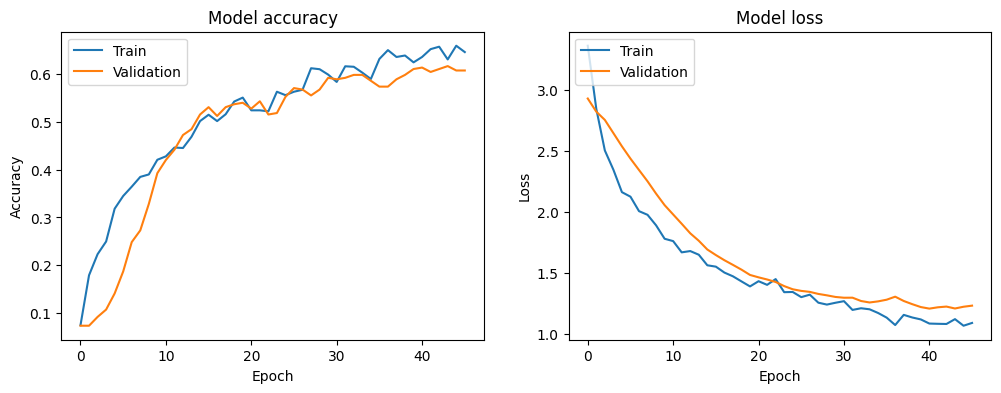

In [29]:
# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [30]:
 model.save('/content/drive/MyDrive/Attendance/best_model.h5')

In [31]:
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/Attendance/best_model.h5')

In [32]:
# Unfreeze some layers of the base model for fine-tuning
for layer in model.layers[0].layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True


In [33]:
# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])



In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('fine_tuned_model.h5', monitor='val_loss', save_best_only=True)

In [35]:
# Continue training the model
fine_tune_history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                              validation_data=(X_val, y_val),
                              epochs=50,callbacks=[model_checkpoint, early_stopping]
                              )



Epoch 1/50
16/16 [==============================] - 11s 436ms/step - loss: 1.0711 - accuracy: 0.6612 - val_loss: 1.1763 - val_accuracy: 0.6288
Epoch 2/50
16/16 [==============================] - 9s 535ms/step - loss: 0.9906 - accuracy: 0.6561 - val_loss: 1.1525 - val_accuracy: 0.6227
Epoch 3/50
16/16 [==============================] - 8s 479ms/step - loss: 0.9961 - accuracy: 0.6725 - val_loss: 1.1179 - val_accuracy: 0.6503
Epoch 4/50
16/16 [==============================] - 8s 453ms/step - loss: 0.9866 - accuracy: 0.6960 - val_loss: 1.0730 - val_accuracy: 0.6472
Epoch 5/50
16/16 [==============================] - 14s 903ms/step - loss: 0.9453 - accuracy: 0.6940 - val_loss: 1.0140 - val_accuracy: 0.6718
Epoch 6/50
16/16 [==============================] - 13s 775ms/step - loss: 0.9394 - accuracy: 0.6991 - val_loss: 0.9754 - val_accuracy: 0.6933
Epoch 7/50
16/16 [==============================] - 9s 573ms/step - loss: 0.8836 - accuracy: 0.7288 - val_loss: 0.9571 - val_accuracy: 0.6994
Epo

In [36]:
# Merge history from initial training and fine-tuning
history.history.update(fine_tune_history.history)

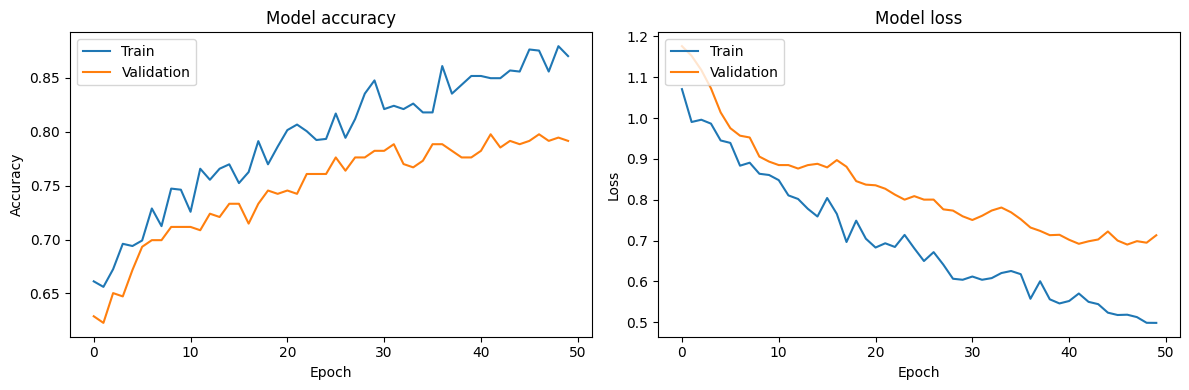

11/11 - 1s - loss: 0.7164 - accuracy: 0.7883 - 758ms/epoch - 69ms/step
Test Loss: 0.7163947820663452
Test Accuracy: 0.7883435487747192


In [37]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy and loss
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the history
plot_history(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [38]:

model.save('/content/drive/MyDrive/Attendance/fine_tuned_model.h5')


In [39]:
from tensorflow.keras.models import load_model

# Load the fine-tuned model from Google Drive
model = load_model('/content/drive/MyDrive/Attendance/fine_tuned_model.h5')


In [40]:
class_indices = {label: idx for idx, label in enumerate(unique_labels)}
print("Class Indices:", class_indices)

Class Indices: {'Angelina Jolie': 0, 'Brad Pitt': 1, 'Denzel Washington': 2, 'Hugh Jackman': 3, 'Jennifer Lawrence': 4, 'Johnny Depp': 5, 'Kate Winslet': 6, 'Leonardo DiCaprio': 7, 'Megan Fox': 8, 'Natalie Portman': 9, 'Nicole Kidman': 10, 'Robert Downey Jr': 11, 'Sandra Bullock': 12, 'Scarlett Johansson': 13, 'Tom Cruise': 14, 'Tom Hanks': 15, 'Will Smith': 16}


In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import pickle



In [42]:
# Load the fitted LabelEncoder
with open('/content/drive/MyDrive/Attendance/label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

In [43]:
# Preprocess a single image
def preprocess_cropped_image(image_path, target_size=(160, 160)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image.astype('float') / 255.0
    image = img_to_array(image)
    return image

In [44]:
def predict_cropped_image(image_path, model, label_encoder, target_size=(160, 160)):
    # Extract true label from the directory structure
    true_label = os.path.basename(os.path.dirname(image_path))

    # Preprocess the image
    image = preprocess_cropped_image(image_path, target_size)
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make predictions
    preds = model.predict(image)
    predicted_label_index = np.argmax(preds)
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]


    return true_label, predicted_label, image[0]

In [ ]:
# def predict_cropped_image(image_path, model, label_encoder, target_size=(160, 160)):
#     true_label = os.path.basename(os.path.dirname(image_path))
#     image = preprocess_cropped_image(image_path, target_size)
#     image = np.expand_dims(image, axis=0)  # Add batch dimension
#     preds = model.predict(image)
#     predicted_label = label_encoder.inverse_transform([np.argmax(preds)])[0]
#     return true_label, predicted_label, image[0]

In [45]:
# Display the image
def display_image(image, true_label, predicted_label):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

In [46]:
# Load the trained model
model_path = '/content/drive/MyDrive/Attendance/fine_tuned_model.h5'
model = load_model(model_path)

1/1 [==============================] - 1s 1s/step


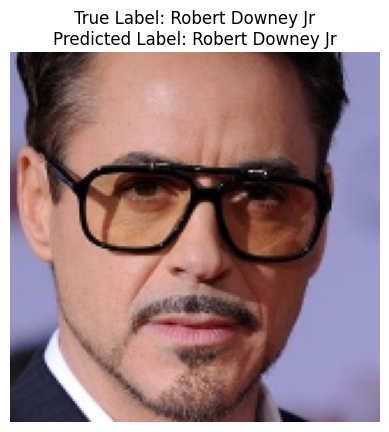

The true label for the image is: Robert Downey Jr
The predicted label for the image is: Robert Downey Jr


In [47]:
import matplotlib.pyplot as plt
# Path to the specific image
image_path = '/content/drive/MyDrive/Attendance/Cropped Faces/Robert Downey Jr/003_e18853f8.jpg'


# Predict the label of the image
true_label, predicted_label, image = predict_cropped_image(image_path, model, label_encoder)

# Display the image
display_image(image, true_label, predicted_label)

print(f'The true label for the image is: {true_label}')
print(f'The predicted label for the image is: {predicted_label}')
